In [2]:
import os.path
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import common

warnings.filterwarnings('ignore')

In [3]:
# ЗАГРУЗКА ПРИЗНАКОВ И МЕТОК

labels = pd.read_csv(common.LabelsPath)
labels.columns = ['Label']

features = pd.read_csv(common.FeaturesPath)
features.columns = ['MFCC ' + str(i) for i in range(1, 21)]

X = np.array(features)
y = np.array(labels).reshape(len(labels))

features.corr()

,MFCC 1,MFCC 2,MFCC 3,MFCC 4,MFCC 5,MFCC 6,MFCC 7,MFCC 8,MFCC 9,MFCC 10,MFCC 11,MFCC 12,MFCC 13,MFCC 14,MFCC 15,MFCC 16,MFCC 17,MFCC 18,MFCC 19,MFCC 20
MFCC 1,1.000000,0.416555,0.110803,0.394952,0.240049,0.204512,0.364745,0.017138,0.061904,0.115879,-0.147352,0.199993,0.167001,-0.111901,0.157197,0.027493,-0.022530,0.152079,-0.129577,-0.280528
MFCC 2,0.416555,1.000000,0.404783,0.449008,0.507427,0.362905,0.418346,0.508019,0.422471,0.056375,0.043357,0.481085,0.387548,0.186515,0.454846,0.216061,-0.087561,0.341938,0.273349,-0.147868
MFCC 3,0.110803,0.404783,1.000000,0.431510,0.404730,0.778651,0.364541,0.569064,0.497578,0.160364,0.426400,0.376714,0.509393,0.495031,0.170622,0.498157,0.294643,0.249307,0.394840,-0.077798
MFCC 4,0.394952,0.449008,0.431510,1.000000,0.682454,0.477195,0.711222,0.341394,0.277521,0.494850,0.215243,0.348623,0.412727,0.258178,0.313815,0.275862,0.380579,0.486209,0.102857,-0.019175
MFCC 5,0.240049,0.507427,0.404730,0.682454,1.000000,0.614752,0.325046,0.446943,0.266333,0.091563,0.348733,0.350938,0.251080,0.315140,0.285293,0.293936,0.204060,0.296102,0.259550,-0.018846
MFCC 6,0.204512,0.362905,0.778651,0.477195,0.614752,1.000000,0.513783,0.382480,0.492815,0.261283,0.299340,0.459138,0.489480,0.432230,0.347085,0.402524,0.240954,0.362422,0.304088,-0.106611
MFCC 7,0.364745,0.418346,0.364541,0.711222,0.325046,0.513783,1.000000,0.457337,0.289719,0.585214,0.261806,0.411368,0.554777,0.371076,0.352122,0.256273,0.358382,0.495999,0.109816,-0.034242
MFCC 8,0.017138,0.508019,0.569064,0.341394,0.446943,0.382480,0.457337,1.000000,0.537478,0.104515,0.591975,0.445812,0.416606,0.567892,0.273043,0.406420,0.269527,0.295009,0.471501,0.153252
MFCC 9,0.061904,0.422471,0.497578,0.277521,0.266333,0.492815,0.289719,0.537478,1.000000,0.435205,0.009253,0.519614,0.404099,0.209143,0.575304,0.279562,-0.011322,0.576495,0.474659,0.087853
MFCC 10,0.115879,0.056375,0.160364,0.494850,0.091563,0.261283,0.585214,0.104515,0.435205,1.000000,0.189782,0.116191,0.343905,0.164310,0.203154,0.098814,0.224452,0.509674,0.180508,0.037398


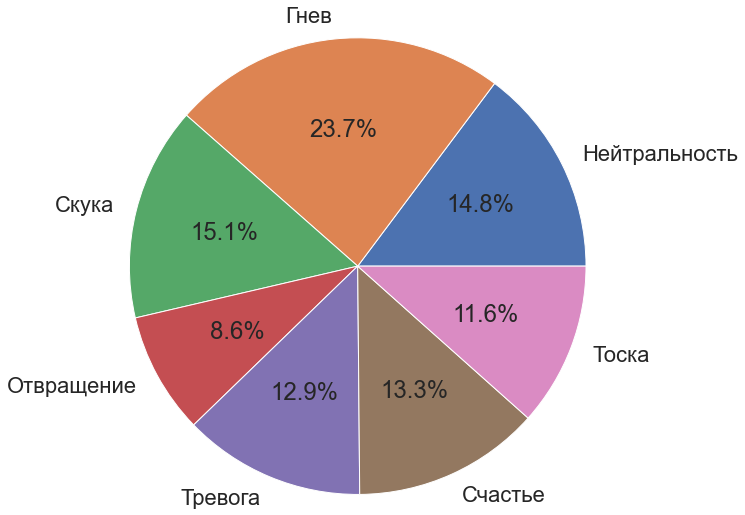

In [25]:
# РАСПРЕДЕЛЕНИЕ ПО КЛАССАМ

labels_count = {common.get_emotion_name_by_label(label) : list(y).count(label) for label in set(y)}

fig, ax = plt.subplots()
p = ax.pie(labels_count.values(), labels=labels_count.keys(), autopct='%1.1f%%', radius=1.5)

fig.savefig(os.path.normpath(f"{common.ImagesPath}{os.sep}distribution.png"), bbox_inches="tight")

In [5]:
# МАСШТАБИРОВАНИЕ ПРИЗНАКОВ

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

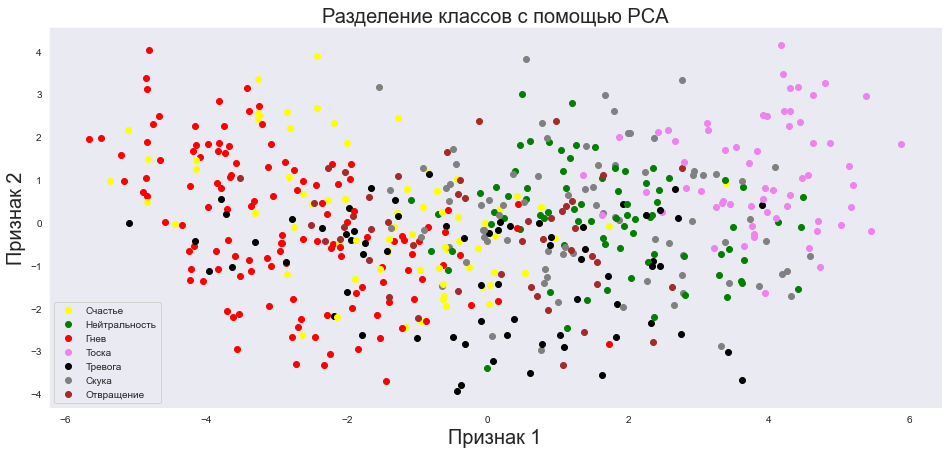

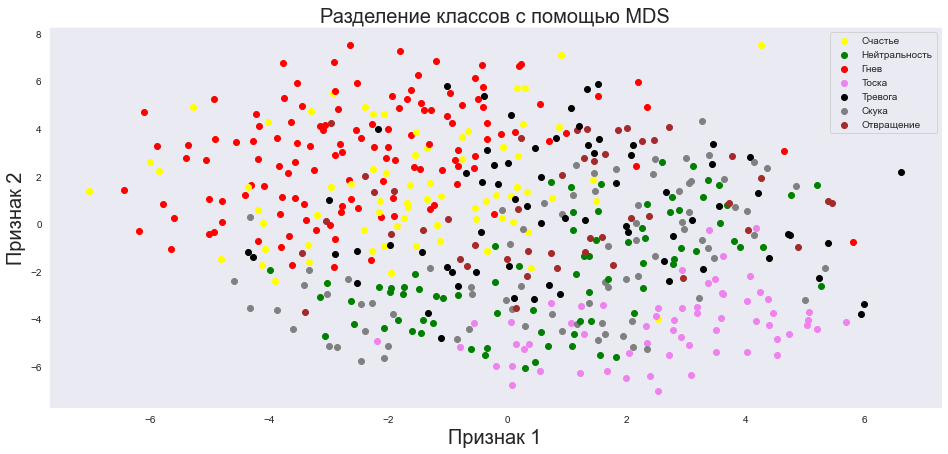

In [6]:
# ВИЗУАЛИЗАЦИЯ РАЗДЕЛЕНИЯ ПО КЛАССАМ С ПОМОЩЬЮ PCA И MDS

def render_class_separation(features_array, title):
    """
    Визуализирует разделение данных по признакам
    """
    label_colors = {0: "green", 1: "red", 2: "grey",
                    3: "brown", 4: "black", 5: "yellow",
                    6: "violet"}
    plt.rcParams['figure.figsize'] = (16,7)
    plt.title(title, fontsize=20)
    plt.xlabel('Признак 1', fontsize=20)
    plt.ylabel('Признак 2', fontsize=20)
    plt.grid()

    for i in range(0, len(y)):
        plt.scatter(features_array[i][0], features_array[i][1], color=label_colors[y[i]], label=common.get_emotion_name_by_label(y[i]))
    h, l = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(l, h))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

# PCA
pca = PCA(n_components=2, random_state=10)
X_pca = pca.fit_transform(X)
render_class_separation(X_pca, "Разделение классов с помощью PCA")

# MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)
render_class_separation(X_mds, "Разделение классов с помощью MDS")

In [7]:
# KNN C PCA

components = [i for i in range(10, 21)]
k = [i for i in range(5, 16)]
pipe = Pipeline([("pca", PCA()), ("clf", KNeighborsClassifier())])
parameters = {"pca__n_components": components, "clf__n_neighbors": k}

gs = GridSearchCV(estimator=pipe, param_grid=parameters, return_train_score=True)
gs.fit(X, y)

pvt1 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_train_score', index='param_pca__n_components', columns='param_clf__n_neighbors')
pvt2 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_test_score', index='param_pca__n_components', columns='param_clf__n_neighbors')

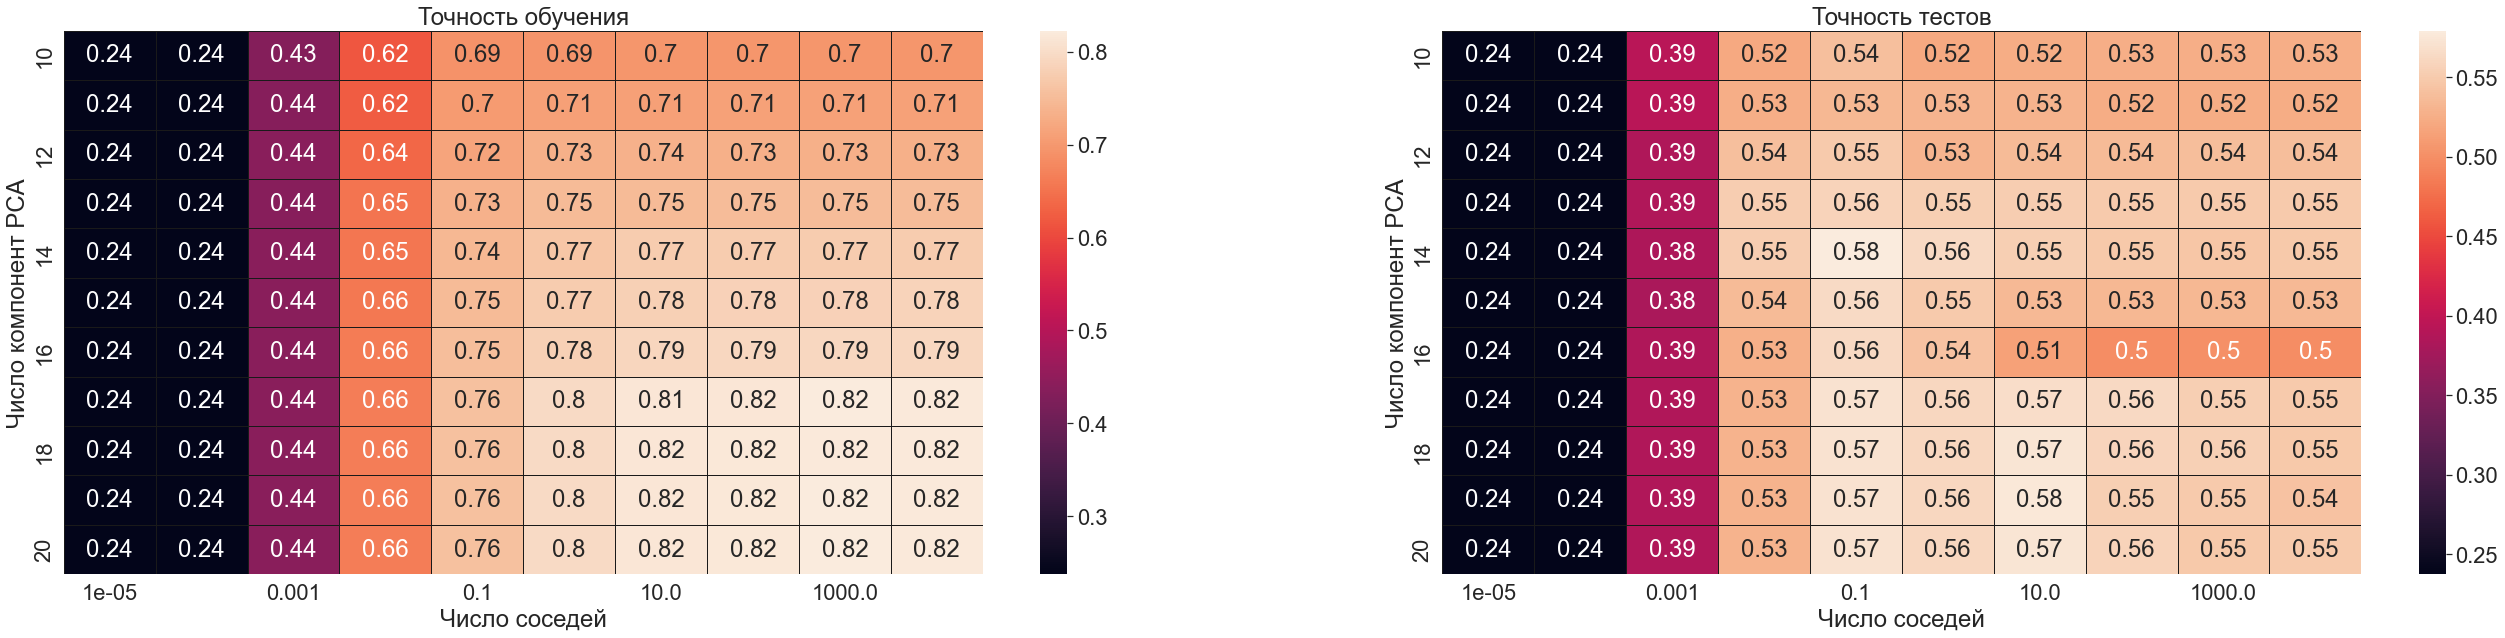

In [13]:
# ТЕПЛОВЫЕ КАРТЫ

plt.figure(figsize=(70,10))

# Точность обучения
plt.subplot(1,3,1)
ax = sns.heatmap(pvt1, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность обучения",
       xlabel="Число соседей",
       ylabel="Число компонент PCA")
sns.set(font_scale=2)

# Точность теста
plt.subplot(1,3,2)
ax = sns.heatmap(pvt2, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность тестов",
       xlabel="Число соседей",
       ylabel="Число компонент PCA")
sns.set(font_scale=2)

plt.show()

In [9]:
# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ C PCA

components = [i for i in range(10, 21)]
regularization = [10**i for i in range(-5,5,1)]
pipe = Pipeline([("pca", PCA()), ("clf", LogisticRegression())])
parameters = {"pca__n_components": components, "clf__C": regularization}

gs = GridSearchCV(estimator=pipe, param_grid=parameters, return_train_score=True)
gs.fit(X, y)

pvt1 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_train_score', index='param_pca__n_components', columns='param_clf__C')
pvt2 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_test_score', index='param_pca__n_components', columns='param_clf__C')

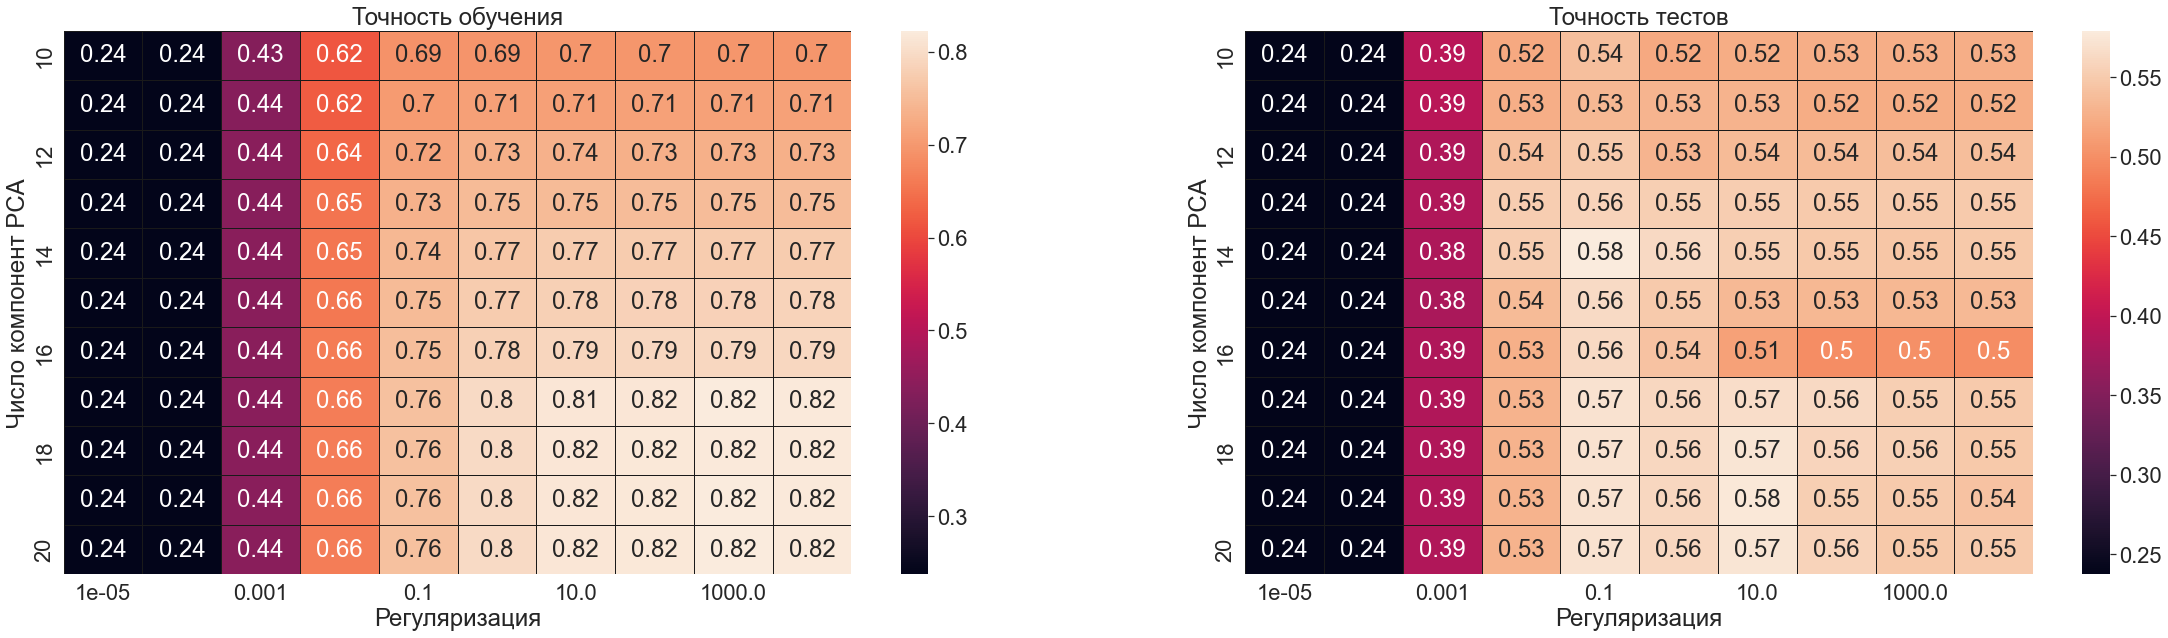

In [10]:
# ТЕПЛОВЫЕ КАРТЫ

plt.figure(figsize=(60,10))

# Точность обучения
plt.subplot(1,3,1)
ax = sns.heatmap(pvt1, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность обучения",
       xlabel="Регуляризация",
       ylabel="Число компонент PCA")
sns.set(font_scale=2)

# Точность теста
plt.subplot(1,3,2)
ax = sns.heatmap(pvt2, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность тестов",
       xlabel="Регуляризация",
       ylabel="Число компонент PCA")
sns.set(font_scale=2)

plt.show()